<a href="https://colab.research.google.com/github/kausar-vento/PCVK_Genap_2023/blob/main/Minggu%2010/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

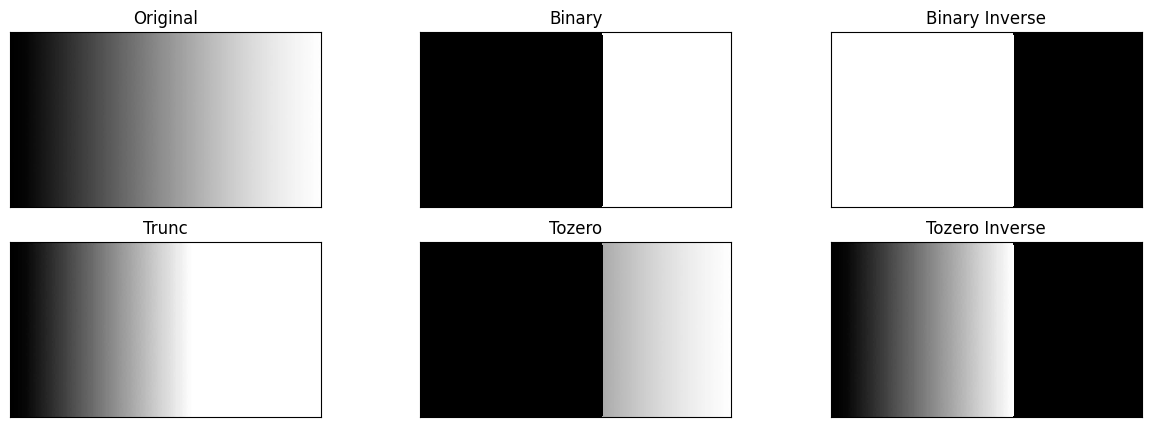

In [3]:
# Membaca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/Images/gradient.jpg', 0)

# Nilai threshold
thresh = 170

# BINARY
binary = np.zeros_like(img)
binary[img > thresh] = 255

# BINARY_INV
binary_inv = np.zeros_like(img)
binary_inv[img <= thresh] = 255

# TRUNC
trunc = np.copy(img)
trunc[img > thresh] = thresh

# TOZERO
tozero = np.copy(img)
tozero[img <= thresh] = 0

# TOZERO_INV
tozero_inv = np.copy(img)
tozero_inv[img > thresh] = 0

# Menampilkan gambar
titles = ['Original', 'Binary', 'Binary Inverse', 'Trunc', 'Tozero', 'Tozero Inverse']
images = [img, binary, binary_inv, trunc, tozero, tozero_inv]

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


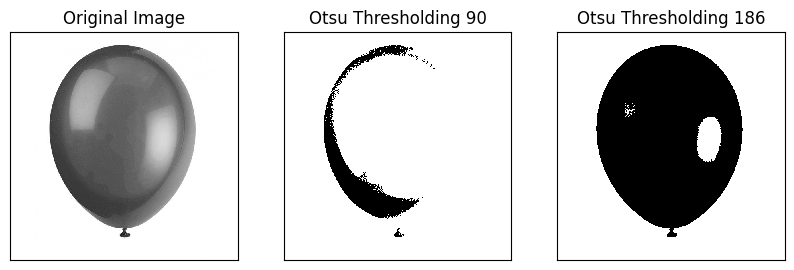

In [4]:
image_2 = cv.imread('/content/drive/MyDrive/PCVK/Images/balloon.jpg', 0)

# Menghitung histogram
hist, bins = np.histogram(image_2.ravel(), 256, [0, 256])

# Menghitung jumlah piksel
pixel_num = np.sum(hist)

# Menghitung probabilitas kemunculan piksel
hist_norm = hist / pixel_num

# Membuat array kumulatif
cum_sum = np.cumsum(hist_norm)

# Membuat array kumulatif rata-rata intensitas piksel
cum_mean = np.cumsum(hist_norm * np.arange(0, 256))

# Menghitung mean global
global_mean = cum_mean[-1]


# Menghitung threshold
threshold = 90
threshold_2 = 186

# Membuat citra hasil
otsu = np.zeros_like(image_2)
otsu[image_2 > threshold] = 255

otsu_2 = np.zeros_like(image_2)
otsu_2[image_2 > threshold_2] = 255

# Menampilkan hasil dan nilai threshold
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_2, cmap='gray', interpolation='nearest')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2)
plt.imshow(otsu, cmap='gray', interpolation='nearest')
plt.title('Otsu Thresholding 90'.format(threshold))
plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3)
plt.imshow(otsu_2, cmap='gray', interpolation='nearest')
plt.title('Otsu Thresholding 186'.format(threshold_2))
plt.xticks([]), plt.yticks([])
plt.show()


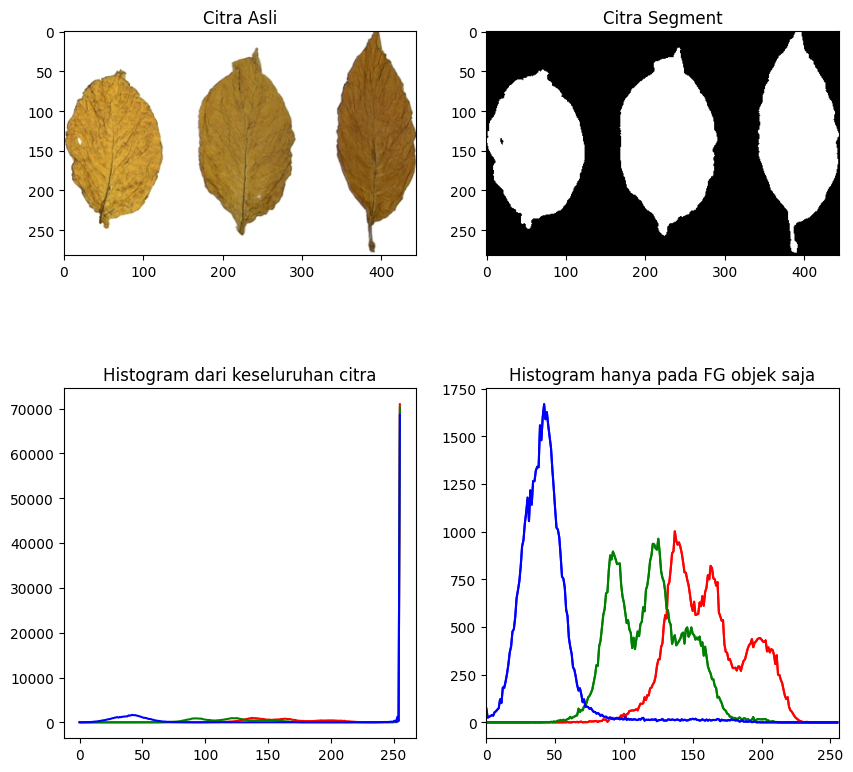

In [5]:
image_3 = ('/content/drive/MyDrive/PCVK/Images/tobacco.jpg')
img_l = cv.imread(image_3)
img_rgb = cv.cvtColor(img_l,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_rgb,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

Text(0.5, 1.0, 'Yellow Segmented Image')

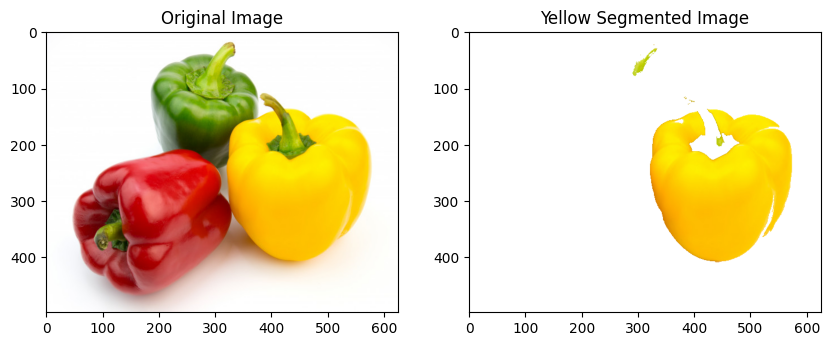

In [7]:
img_asli = cv.imread('/content/drive/MyDrive/PCVK/Images/peppers.jpg')
convert_img = cv.cvtColor(img_asli, cv.COLOR_BGR2RGB)

float = np.float32(convert_img.reshape((-1, 3)))
kriteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
attempts = 10
flags = cv.KMEANS_RANDOM_CENTERS


ret, label, center = cv.kmeans(float, K, None, kriteria, attempts, flags)


center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((convert_img.shape))
hsv = cv.cvtColor(res2, cv.COLOR_RGB2HSV)
lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])
mask = cv.inRange(hsv, lower_yellow, upper_yellow)
result = cv.bitwise_and(convert_img, convert_img, mask=mask)
background = np.zeros_like(result)
background.fill(255)


mask_3d = np.repeat(mask[:, :, np.newaxis], 3, axis=2)
result[mask_3d == 0] = background[mask_3d == 0]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(convert_img)
plt.title('Original Image')
plt.subplot(2,2,2),plt.imshow(result)
plt.title('Yellow Segmented Image')

kesulitan adalah mencari supaya hanya menampilkan warna kuning

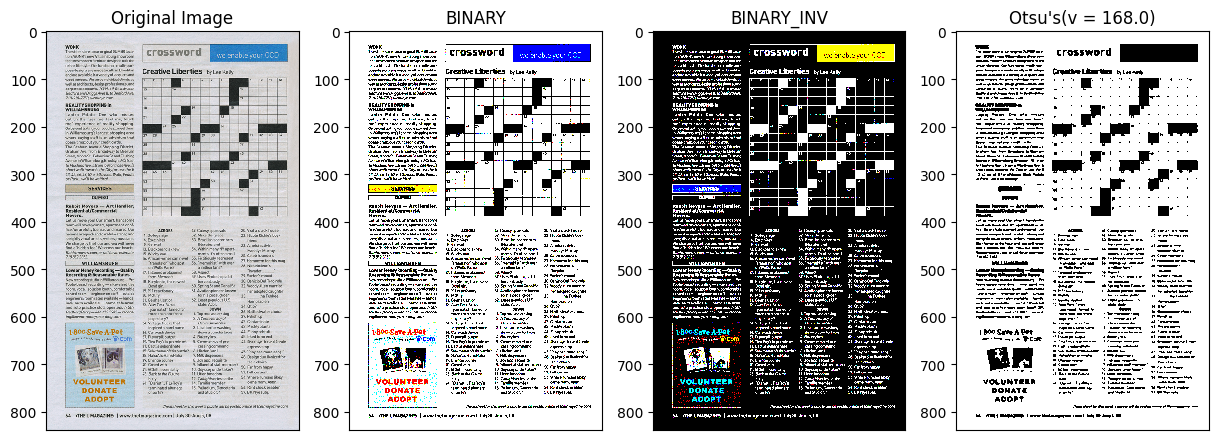

In [9]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/crossword.jpg')
img_gray= cv.cvtColor(img, cv.COLOR_RGB2GRAY)
blur = cv.GaussianBlur(img_gray,(5,5),0)
thresh = 168

ret, thresh1 = cv.threshold(img, thresh,255,cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img, thresh,255,cv.THRESH_BINARY_INV)
ret2, th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

x = ("Otsu's(v = ") + str(ret2)+")"
titles = ['Original Image', 'BINARY', 'BINARY_INV', x]
images = [img, thresh1, thresh2, th2]

plt.figure(figsize = (15,12))

for i in range(len(images)):
  plt.subplot(2,4,i+1), plt.imshow(images[i], 'gray', interpolation = 'nearest')
  plt.title(titles[i])
  plt.xticks([])